In [19]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': ' b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-20T04:37:05.658Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 8863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9941, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [50]:
import pandas as pd

#jason normalizing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9941,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.926729e+07,1.926729e+07,NaN,1,NaN,NaN,None,2023-01-20T04:35:00.000Z,21119.366392,2.082623e+10,-30.2372,0.095475,1.347206,11.945298,25.553688,30.644704,10.237946,4.069129e+11,41.3882,4.435067e+11,None,2023-01-20T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:33:30.353117+00:00
1,1027,Ethereum,ETH,ethereum,6366,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-20T04:35:00.000Z,1556.520795,6.194906e+09,-38.8025,0.125135,1.721785,10.059207,28.777628,37.649059,19.873763,1.904775e+11,19.3818,1.904775e+11,None,2023-01-20T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:33:30.353117+00:00
2,825,Tether,USDT,tether,46300,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.648484e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-20T04:35:00.000Z,1.000117,2.581531e+10,-34.5452,0.002612,0.010953,-0.001629,0.004278,0.134629,0.004429,6.649259e+10,6.7642,7.315029e+10,None,2023-01-20T04:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-20 05:33:30.353117+00:00
3,1839,BNB,BNB,bnb,1169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.579039e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-01-20T04:35:00.000Z,295.418509,4.167705e+08,-49.6433,0.102901,1.430838,2.012077,19.121892,13.682868,9.809362,4.664773e+10,4.7448,5.908370e+10,None,2023-01-20T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:33:30.353117+00:00
4,3408,USD Coin,USDC,usd-coin,9598,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.307787e+10,4.307787e+10,NaN,5,NaN,NaN,None,2023-01-20T04:35:00.000Z,1.000068,2.994405e+09,-28.6068,0.012244,-0.008339,0.009736,0.002459,-0.016915,0.009155,4.308079e+10,4.3836,4.308079e+10,None,2023-01-20T04:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-20 05:33:30.353117+00:00
5,52,XRP,XRP,xrp,877,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.071332e+10,9.998916e+10,NaN,6,NaN,NaN,None,2023-01-20T04:35:00.000Z,0.391605,1.040123e+09,-28.2714,-0.038895,2.818004,3.319271,15.130841,9.813338,-14.743589,1.985959e+10,2.0208,3.916049e+10,None,2023-01-20T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:33:30.353117+00:00
6,4687,Binance USD,BUSD,binance-usd,6043,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.637292e+10,1.637292e+10,NaN,7,NaN,NaN,None,2023-01-20T04:35:00.000Z,1.000028,7.475320e+09,-25.3965,0.018152,-0.034747,-0.025459,-0.011374,-0.074210,0.018620,1.637338e+10,1.6661,1.637338e+10,None,2023-01-20T04:35:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-20 05:33:30.353117+00:00
7,2010,Cardano,ADA,cardano,636,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.455964e+10,3.537676e+10,NaN,8,NaN,NaN,None,2023-01-20T04:35:00.000Z,0.340375,2.375373e+08,-47.8573,0.074969,2.413433,3.204120,34.846059,10.939056,-1.830009,1.176323e+10,1.1970,1.531686e+10,None,2023-01-20T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:33:30.353117+00:00
8,74,Dogecoin,DOGE,dogecoin,636,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",

In [55]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now', utc=True)
    
    df 
    
    if not os.path.isfile(r'C:\Users\june\Desktop\python scripts\API.csv'):
        df.to_csv(r'C:\Users\june\Desktop\python scripts\API.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\june\Desktop\python scripts\API.csv', mode='a', header = False)

In [56]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)#sleep for 1 minute
exit()

{'status': {'timestamp': '2023-01-20T06:58:53.504Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 8865}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9941, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

{'status': {'timestamp': '2023-01-20T06:59:53.751Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 8865}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9941, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [58]:
df72=pd.read_csv(r'C:\Users\june\Desktop\python scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9941,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.926736e+07,1.926736e+07,NaN,1,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,20968.127878,2.135021e+10,-28.6625,-0.145284,0.575613,11.255525,24.479101,29.933466,9.487950,4.040005e+11,41.4024,4.403307e+11,NaN,2023-01-20T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:58:53.038679+00:00
1,1,1027,Ethereum,ETH,ethereum,6366,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,1546.132306,6.202715e+09,-39.5590,-0.155931,1.007377,9.614591,27.571605,36.852954,19.082272,1.892062e+11,19.3955,1.892062e+11,NaN,2023-01-20T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:58:53.038679+00:00
2,2,825,Tether,USDT,tether,46300,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.648484e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,1.000040,2.640469e+10,-32.7363,-0.000483,0.001725,-0.007199,-0.007875,0.125848,-0.003053,6.648752e+10,6.8137,7.314472e+10,NaN,2023-01-20T06:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-20 06:58:53.038679+00:00
3,3,1839,BNB,BNB,bnb,1169,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.579039e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,287.912905,4.717150e+08,-42.9928,-0.476832,-0.989819,-0.332351,15.674229,10.276636,6.798918,4.546256e+10,4.6597,5.758258e+10,NaN,2023-01-20T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:58:53.038679+00:00
4,4,3408,USD Coin,USDC,usd-coin,9599,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.309974e+10,4.309974e+10,NaN,5,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,0.999946,2.972948e+09,-30.9793,0.001206,-0.004606,-0.009548,-0.009678,-0.019987,-0.009289,4.309742e+10,4.4179,4.309742e+10,NaN,2023-01-20T06:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-20 06:58:53.038679+00:00
5,5,52,XRP,XRP,xrp,877,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.071332e+10,9.998916e+10,NaN,6,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,0.387499,1.060178e+09,-25.6201,-0.423260,0.826248,2.973600,13.632184,8.774484,-15.324403,1.965137e+10,2.0147,3.874991e+10,NaN,2023-01-20T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:58:53.038679+00:00
6,6,4687,Binance USD,BUSD,binance-usd,6043,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.632099e+10,1.632099e+10,NaN,7,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,0.999958,7.600980e+09,-26.1147,0.012143,-0.010591,-0.071494,0.029757,-0.144377,-0.063638,1.632031e+10,1.6732,1.632031e+10,NaN,2023-01-20T06:57:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-20 06:58:53.038679+00:00
7,7,2010,Cardano,ADA,cardano,636,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.455964e+10,3.537676e+10,NaN,8,NaN,NaN,NaN,2023-01-20T06:57:00.000Z,0.335222,2.415249e+08,-46.8276,-0.522682,0.614800,1.917401,33.201291,9.302545,-3.330478,1.158516e+10,1.1876,1.508500e+10,NaN,2023-01-20T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:58:53.038679+00:00
8,8,74,Dogecoin,DOGE,dogecoin,636,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt',

In [54]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9941,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.926729e+07,1.926729e+07,NaN,1,NaN,NaN,None,2023-01-20T05:36:00.000Z,20985.126267,2.120279e+10,-29.0709,-0.623663,0.810182,11.561221,24.646290,29.741286,9.554638,4.043265e+11,41.3797,4.406877e+11,None,2023-01-20T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:37:25.849627+00:00
1,1027,Ethereum,ETH,ethereum,6366,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-20T05:36:00.000Z,1547.852041,6.211230e+09,-39.0892,-0.543558,1.252666,9.736959,27.937991,36.667782,19.364246,1.894166e+11,19.3920,1.894166e+11,None,2023-01-20T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:37:25.849627+00:00
2,825,Tether,USDT,tether,46300,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.648484e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-20T05:36:00.000Z,1.000088,2.624994e+10,-33.3305,-0.001730,0.007941,0.000225,-0.000708,0.131711,0.003023,6.649070e+10,6.8048,7.314822e+10,None,2023-01-20T05:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-20 05:37:25.849627+00:00
3,1839,BNB,BNB,bnb,1169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.579039e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-01-20T05:36:00.000Z,290.880329,4.358928e+08,-47.2481,-1.526832,0.059102,0.505332,16.999839,11.738264,8.169432,4.593113e+10,4.7014,5.817607e+10,None,2023-01-20T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:37:25.849627+00:00
4,3408,USD Coin,USDC,usd-coin,9598,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.307787e+10,4.307787e+10,NaN,5,NaN,NaN,None,2023-01-20T05:36:00.000Z,0.999933,2.961969e+09,-30.3981,-0.013663,-0.008732,0.008143,-0.010119,-0.040315,0.001587,4.307499e+10,4.4099,4.307499e+10,None,2023-01-20T05:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-20 05:37:25.849627+00:00
5,52,XRP,XRP,xrp,877,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.071332e+10,9.998916e+10,NaN,6,NaN,NaN,None,2023-01-20T05:36:00.000Z,0.388007,1.054288e+09,-26.7422,-0.912564,1.294599,2.566122,13.592692,8.440111,-15.192637,1.967712e+10,2.0139,3.880070e+10,None,2023-01-20T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:37:25.849627+00:00
6,4687,Binance USD,BUSD,binance-usd,6043,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.637292e+10,1.637292e+10,NaN,7,NaN,NaN,None,2023-01-20T05:36:00.000Z,1.000014,7.551363e+09,-25.2814,-0.018453,-0.045461,-0.029157,0.000577,-0.083787,-0.038862,1.637315e+10,1.6762,1.637315e+10,None,2023-01-20T05:36:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-20 05:37:25.849627+00:00
7,2010,Cardano,ADA,cardano,636,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.455964e+10,3.537676e+10,NaN,8,NaN,NaN,None,2023-01-20T05:36:00.000Z,0.337098,2.391561e+08,-47.4876,-0.957528,1.566586,2.665416,34.377507,9.726885,-2.136365,1.164999e+10,1.1927,1.516942e+10,None,2023-01-20T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 05:37:25.849627+00:00
8,74,Dogecoin,DOGE,dogecoin,636,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [60]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [61]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9941,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19267362.00000,19267362.00000,NaN,1,NaN,NaN,None,2023-01-20T06:58:00.000Z,20963.82093,21338504838.97896,-28.70750,-0.12727,0.56713,11.17468,24.46206,29.99705,9.45186,403917526778.49597,41.41210,440240239548.53998,None,2023-01-20T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:59:53.290506+00:00
1,1027,Ethereum,ETH,ethereum,6366,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-01-20T06:58:00.000Z,1545.72677,6207942063.37130,-39.49510,-0.13649,0.98458,9.52080,27.55487,36.84835,19.04426,189156560420.30557,19.39050,189156560420.31000,None,2023-01-20T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:59:53.290506+00:00
2,825,Tether,USDT,tether,46300,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66484835812.20267,73141766321.23428,NaN,3,NaN,NaN,None,2023-01-20T06:58:00.000Z,1.00009,26375895687.42215,-32.83830,0.00424,0.00919,-0.00490,-0.00129,0.13058,0.00184,66491060640.14207,6.81710,73148614422.83000,None,2023-01-20T06:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-20 06:59:53.290506+00:00
3,1839,BNB,BNB,bnb,1169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,157903878.10070,159979963.59043,NaN,4,NaN,NaN,None,2023-01-20T06:58:00.000Z,287.76367,471878058.29567,-42.95560,-0.42403,-1.00767,-0.43700,15.64511,10.25301,6.74414,45438999365.75932,4.65730,57552733868.62000,None,2023-01-20T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:59:53.290506+00:00
4,3408,USD Coin,USDC,usd-coin,9599,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43099741640.58027,43099741640.58027,NaN,5,NaN,NaN,None,2023-01-20T06:58:00.000Z,0.99995,2968439776.06305,-31.26490,0.00840,-0.00308,-0.00841,-0.00346,-0.02544,-0.01348,43097590001.08657,4.41790,43097590001.09000,None,2023-01-20T06:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-20 06:59:53.290506+00:00
5,52,XRP,XRP,xrp,877,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50713323547.00000,99989156648.00000,NaN,6,NaN,NaN,None,2023-01-20T06:58:00.000Z,0.38778,1060365742.95932,-25.55590,-0.24569,0.93014,2.98128,13.83165,8.92220,-15.27108,19665497573.34849,2.01610,38777773172.61000,None,2023-01-20T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-20 06:59:53.290506+00:00
6,4687,Binance USD,BUSD,binance-usd,6043,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16320993634.00406,16320993634.00406,NaN,7,NaN,NaN,None,2023-01-20T06:58:00.000Z,1.00022,7603438224.12169,-26.28470,-0.00698,0.01106,0.00467,0.03997,-0.09713,-0.02948,16324664174.31581,1.67360,16324664174.32000,None,2023-01-20T06:58:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-01-20 06:59:53.290506+00:00
7,2010,Cardano,ADA,cardano,636,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34559640900.72800,35376761378.95700,NaN,8,NaN,NaN,None,2023-01-20T06:58:00.000Z,0.33514,241556018.14501,-46.82070,-0.47566,0.61301,1.80304,33.24638,9.34269,-3.36616,11582308375.07108,1.18730,15081287400.39000,None,2023-01-20T

In [63]:

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12727,0.56713,11.17468,24.46206,29.99705,9.45186
Ethereum,-0.13649,0.98458,9.52080,27.55487,36.84835,19.04426
Tether,0.00424,0.00919,-0.00490,-0.00129,0.13058,0.00184
BNB,-0.42403,-1.00767,-0.43700,15.64511,10.25301,6.74414
USD Coin,0.00840,-0.00308,-0.00841,-0.00346,-0.02544,-0.01348
XRP,-0.24569,0.93014,2.98128,13.83165,8.92220,-15.27108
Binance USD,-0.00698,0.01106,0.00467,0.03997,-0.09713,-0.02948
Cardano,-0.47566,0.61301,1.80304,33.24638,9.34269,-3.36616
Dogecoin,-0.17145,-0.31077,0.39836,11.16014,5.54612,36.47504


In [64]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.12727
             quote.USD.percent_change_24h     0.56713
             quote.USD.percent_change_7d     11.17468
             quote.USD.percent_change_30d    24.46206
             quote.USD.percent_change_60d    29.99705
             quote.USD.percent_change_90d     9.45186
Ethereum     quote.USD.percent_change_1h     -0.13649
             quote.USD.percent_change_24h     0.98458
             quote.USD.percent_change_7d      9.52080
             quote.USD.percent_change_30d    27.55487
             quote.USD.percent_change_60d    36.84835
             quote.USD.percent_change_90d    19.04426
Tether       quote.USD.percent_change_1h      0.00424
             quote.USD.percent_change_24h     0.00919
             quote.USD.percent_change_7d     -0.00490
             quote.USD.percent_change_30d    -0.00129
             quote.USD.percent_change_60d     0.13058
             quote.USD.percent_change_90

In [66]:
type(df4)

pandas.core.series.Series

In [67]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.12727
            quote.USD.percent_change_24h   0.56713
            quote.USD.percent_change_7d   11.17468
            quote.USD.percent_change_30d  24.46206
            quote.USD.percent_change_60d  29.99705
            quote.USD.percent_change_90d   9.45186
Ethereum    quote.USD.percent_change_1h   -0.13649
            quote.USD.percent_change_24h   0.98458
            quote.USD.percent_change_7d    9.52080
            quote.USD.percent_change_30d  27.55487
            quote.USD.percent_change_60d  36.84835
            quote.USD.percent_change_90d  19.04426
Tether      quote.USD.percent_change_1h    0.00424
            quote.USD.percent_change_24h   0.00919
            quote.USD.percent_change_7d   -0.00490
            quote.USD.percent_change_30d  -0.00129
            quote.USD.percent_change_60d   0.13058
            quote.USD.percent_change_90d   0.00184
BNB         quote.USD.percent_change_1h   -0.42403
            quote.USD.percent_change_24h  -1.00767
            quote.USD.percent_change_7d   -0.43700
            quote.USD.percent_change_30d  15.64511
            quote.USD.percent_change_60d  10.25301
            quote.USD.percent_change_90d   6.74414
USD Coin    quote.USD.percent_change_1h    0.00840
            quote.USD.percent_change_24h  -0.00308
            quote.USD.percent_change_7d   -0.00841
            quote.USD.percent_change_30d  -0.00346
            quote.USD.percent_change_60d  -0.02544
            quote.USD.percent_change_90d  -0.01348
XRP         quote.USD.percent_change_1h   -0.24569
            quote.USD.percent_change_24h   0.93014
            quote.USD.percent_change_7d    2.98128
            quote.USD.percent_change_30d  13.83165
            quote.USD.percent_change_60d   8.92220
            quote.USD.percent_change_90d -15.27108
Binance USD quote.USD.percent_change_1h   -0.00698
            quote.USD.percent_change_24h   0.01106
            quote.USD.percent_change_7d    0.00467
            quote.USD.percent_change_30d   0.03997
            quote.USD.percent_change_60d  -0.09713
            quote.USD.percent_change_90d  -0.02948
Cardano     quote.USD.percent_change_1h   -0.47566
            quote.USD.percent_change_24h   0.61301
            quote.USD.percent_change_7d    1.80304
            quote.USD.percent_change_30d  33.24638
            quote.USD.percent_change_60d   9.34269
            quote.USD.percent_change_90d  -3.36616
Dogecoin    quote.USD.percent_change_1h   -0.17145
            quote.USD.percent_change_24h  -0.31077
            quote.USD.percent_change_7d    0.39836
            quote.USD.percent_change_30d  11.16014
            quote.USD.percent_change_60d   5.54612
            quote.USD.percent_change_90d  36.47504
Polygon     quote.USD.percent_change_1h   -0.25519
            quote.USD.percent_change_24h  -0.59410
            quote.USD.percent_change_7d    3.25359
            quote.USD.percent_change_30d  18.76351
            quote.USD.percent_change_60d  17.00340
            quote.USD.percent_change_90d  14.82347
Solana      quote.USD.percent_change_1h    0.02750
            quote.USD.percent_change_24h  -1.77267
            quote.USD.percent_change_7d   23.94768
            quote.USD.percent_change_30d  75.03468
            quote.USD.percent_change_60d  78.56058
            quote.USD.percent_change_90d -24.07818
Polkadot    quote.USD.percent_change_1h    0.01562
            quote.USD.percent_change_24h   0.81868
            quote.USD.percent_change_7d   10.77747
            quote.USD.percent_change_30d  28.71392
            quote.USD.percent_change_60d  10.72312
            quote.USD.percent_change_90d  -0.06940
Shiba Inu   quote.USD.percent_change_1h   -0.23130
            quote.USD.percent_change_24h   2.04664
            quote.USD.percent_change_7d   19.96175
            quote.USD.percent_change_30d  37.77712
            quote.USD.percent_change_60d  31.51500
            quo

In [71]:
df4.count()

90

In [74]:
index=pd.Index(range(90))

df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12727
1,Bitcoin,quote.USD.percent_change_24h,0.56713
2,Bitcoin,quote.USD.percent_change_7d,11.17468
3,Bitcoin,quote.USD.percent_change_30d,24.46206
4,Bitcoin,quote.USD.percent_change_60d,29.99705
5,Bitcoin,quote.USD.percent_change_90d,9.45186
6,Ethereum,quote.USD.percent_change_1h,-0.13649
7,Ethereum,quote.USD.percent_change_24h,0.98458
8,Ethereum,quote.USD.percent_change_7d,9.52080
9,Ethereum,quote.USD.percent_change_30d,27.55487


In [77]:
df7=df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12727
1,Bitcoin,quote.USD.percent_change_24h,0.56713
2,Bitcoin,quote.USD.percent_change_7d,11.17468
3,Bitcoin,quote.USD.percent_change_30d,24.46206
4,Bitcoin,quote.USD.percent_change_60d,29.99705
5,Bitcoin,quote.USD.percent_change_90d,9.45186
6,Ethereum,quote.USD.percent_change_1h,-0.13649
7,Ethereum,quote.USD.percent_change_24h,0.98458
8,Ethereum,quote.USD.percent_change_7d,9.52080
9,Ethereum,quote.USD.percent_change_30d,27.55487


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12727
1,Bitcoin,24h,0.56713
2,Bitcoin,7d,11.17468
3,Bitcoin,30d,24.46206
4,Bitcoin,60d,29.99705
5,Bitcoin,90d,9.45186
6,Ethereum,1h,-0.13649
7,Ethereum,24h,0.98458
8,Ethereum,7d,9.52080
9,Ethereum,30d,27.55487


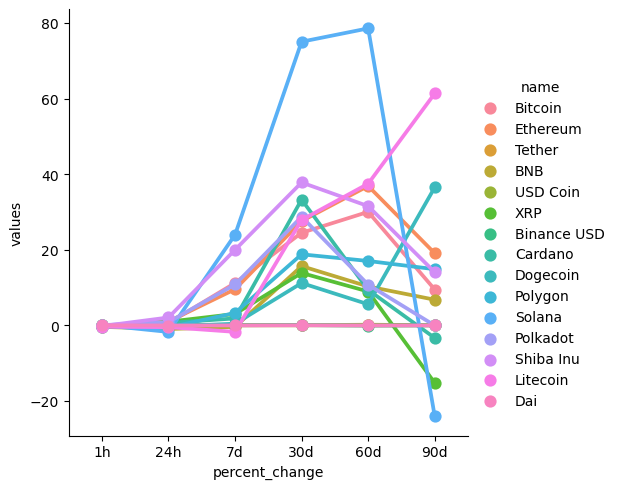

In [92]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind = 'point')

In [98]:
df10=df72[['name','quote.USD.price','timestamp']]
df10=df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,20968.12788,2023-01-20 06:58:53.038679+00:00
15,Bitcoin,20963.82093,2023-01-20 06:59:53.290506+00:00


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

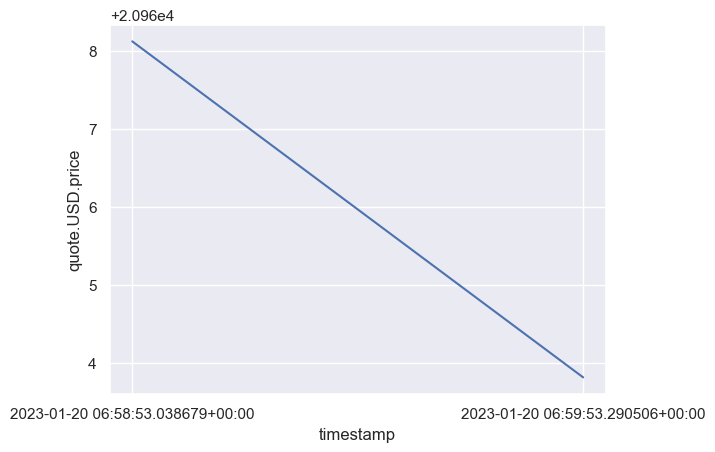

In [101]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df10)